In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [101]:
df = pd.read_csv('credit.csv',sep=',')

In [102]:
df.head(2)

Time        V1        V2        V3  ...       V27       V28  Amount  Class
0     0 -1.359807 -0.072781  2.536347  ...  0.133558 -0.021053  149.62      0
1     0  1.191857  0.266151  0.166480  ... -0.008983  0.014724    2.69      0

[2 rows x 31 columns]

In [103]:
df['Class'].value_counts()

0    9961
1      38
Name: Class, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 4000.0)

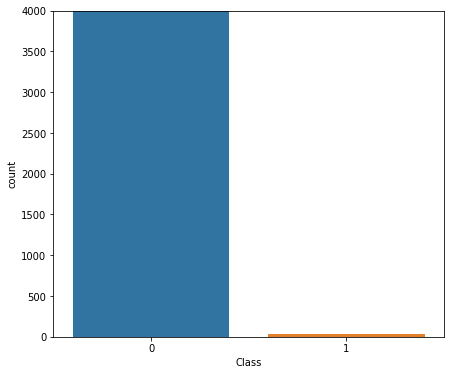

In [104]:
plt.figure(figsize=(7,6))
sns.countplot('Class',data=df)
plt.ylim(0,4000)

In [105]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [106]:
fraud = df[df['Class']==1]
normal = df[df['Class']==0]
print(fraud.shape , normal.shape)

(38, 31) (9961, 31)


In [107]:
fraud.describe()

Time         V1         V2  ...        V28       Amount  Class
count     38.000000  38.000000  38.000000  ...  38.000000    38.000000   38.0
mean    9063.157895  -1.796662   3.810809  ...   0.355663    75.730526    1.0
std     3075.746620   2.037031   2.290094  ...   0.409671   304.521215    0.0
min      406.000000  -5.454362  -3.157307  ...  -0.900452     0.000000    1.0
25%     7625.500000  -3.385216   2.526633  ...   0.147212     1.000000    1.0
50%     8571.000000  -1.994623   3.676272  ...   0.355366     1.000000    1.0
75%    11504.500000   0.315993   4.766769  ...   0.681292     1.000000    1.0
max    14152.000000   1.234235   8.636214  ...   1.108933  1809.680000    1.0

[8 rows x 31 columns]

In [108]:
normal.describe()

Time           V1           V2  ...          V28       Amount   Class
count   9961.000000  9961.000000  9961.000000  ...  9961.000000  9961.000000  9961.0
mean    5953.310109    -0.235837     0.268366  ...     0.001566    62.972075     0.0
std     4473.207006     1.516513     1.284759  ...     0.264698   183.908599     0.0
min        0.000000   -27.670569   -34.607649  ...    -3.509250     0.000000     0.0
25%     2062.000000    -1.009597    -0.210717  ...    -0.015812     5.140000     0.0
50%     4549.000000    -0.370749     0.284236  ...     0.015733    15.950000     0.0
75%    10222.000000     1.151700     0.895345  ...     0.076529    51.180000     0.0
max    15010.000000     1.960497     8.261750  ...     4.860769  7712.430000     0.0

[8 rows x 31 columns]

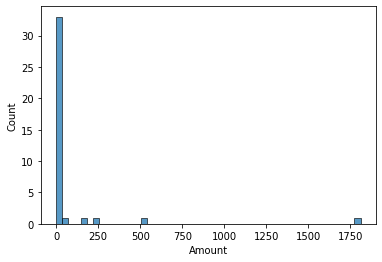

In [109]:
sns.histplot(fraud['Amount'],bins=50)

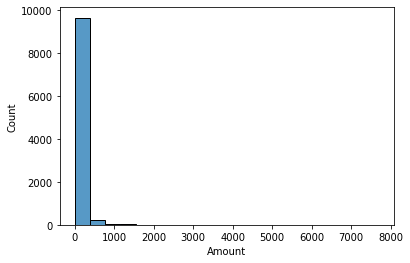

In [110]:
sns.histplot(normal['Amount'],bins=20)

In [111]:
X= df.drop('Class',axis=1)
y = df['Class']

In [112]:
X.shape , y.shape

((9999, 30), (9999,))

In [113]:
outlier_frac = len(fraud)/float(len(normal))
outlier_frac

0.0038148780242947497

In [114]:
rng = np.random.RandomState(42)
X_outliers = rng.uniform(low=-4, high=4, size=(20, 2))

In [115]:
from sklearn.ensemble import IsolationForest

In [116]:
model = IsolationForest(n_estimators=100,random_state=rng,contamination=outlier_frac,max_samples=len(X))

In [117]:
y_pred = model.fit_predict(X)

In [118]:
new = pd.Series(y_pred)
new.value_counts()

 1    9960
-1      39
dtype: int64

In [119]:
y_pred[y_pred==1] = 0
y_pred[y_pred==-1]=1

In [120]:
number_of_outliers = (y != y_pred).sum()

In [121]:
print(number_of_outliers)

47


In [122]:
(y == y_pred).sum()

9952

In [135]:
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix

In [124]:
accuracy_score(y,y_pred)

0.9952995299529953

In [136]:
confusion_matrix(y,y_pred)

array([[9937,   24],
       [  23,   15]])

In [125]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9961
           1       0.38      0.39      0.39        38

    accuracy                           1.00      9999
   macro avg       0.69      0.70      0.69      9999
weighted avg       1.00      1.00      1.00      9999



**LOCAL OUTLIER FACTOR**

In [126]:
from sklearn.neighbors import LocalOutlierFactor

In [127]:
model1 = LocalOutlierFactor(contamination=outlier_frac)

In [128]:
y_pred1 = model1.fit_predict(X)

In [129]:
(pd.Series(y_pred1)).value_counts()

 1    9960
-1      39
dtype: int64

In [130]:
y_pred1[y_pred1==1] = 0
y_pred1[y_pred1==-1]=1

In [131]:
(y != y_pred1).sum()  ##### detected 73 outliers

73

In [132]:
(y == y_pred1).sum()

9926

In [133]:
accuracy_score(y,y_pred1)

0.9926992699269926

In [134]:
print(classification_report(y,y_pred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9961
           1       0.05      0.05      0.05        38

    accuracy                           0.99      9999
   macro avg       0.52      0.52      0.52      9999
weighted avg       0.99      0.99      0.99      9999

